In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


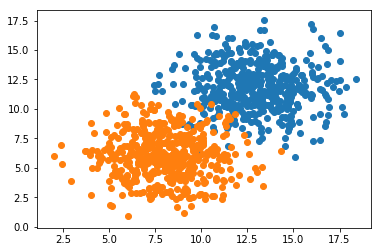

In [2]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
Y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [3]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam, loss='binary_crossentropy', metrics = ['accuracy'])
h = model.fit(x = X, y = Y, verbose=1, batch_size=50, epochs = 50,shuffle=True)

Epoch 1/500
1000/1000 [==============================] - 2s 2ms/step - loss: 1.5582 - acc: 0.5460
Epoch 2/500
1000/1000 [==============================] - 0s 28us/step - loss: 0.6644 - acc: 0.6120
Epoch 3/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.4452 - acc: 0.8610
Epoch 4/500
1000/1000 [==============================] - 0s 28us/step - loss: 0.3900 - acc: 0.8930
Epoch 5/500
1000/1000 [==============================] - 0s 30us/step - loss: 0.3469 - acc: 0.9040
Epoch 6/500
1000/1000 [==============================] - 0s 28us/step - loss: 0.3140 - acc: 0.9220
Epoch 7/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.2946 - acc: 0.9320
Epoch 8/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.2664 - acc: 0.9380
Epoch 9/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.2397 - acc: 0.9570
Epoch 10/500
1000/1000 [==============================] - 0s 28us/step - loss: 0.2237 - acc: 0.9620
Epoch 11/5

Text(0.5, 1.0, 'accuracy')

Text(0.5, 0, 'epoch')

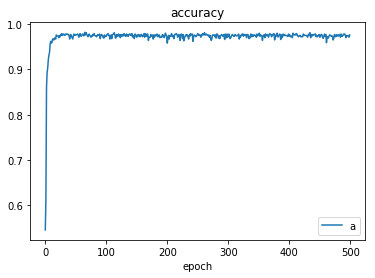

In [4]:
plt.plot(h.history['acc'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend('accuracy')

Text(0.5, 1.0, 'loss')

Text(0.5, 0, 'epoch')

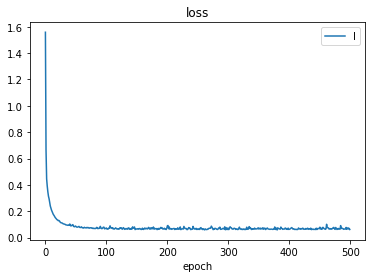

In [5]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend('loss')

In [6]:
def plot_decision_boundary(X,Y,model):
    x_span = np.linspace(min(X[:, 0])-1, max(X[:,0]+1))
    y_span = np.linspace(min(X[:, 1])-1, max(X[:,1]+1))
    xx, yy = np.meshgrid(x_span, y_span)  
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

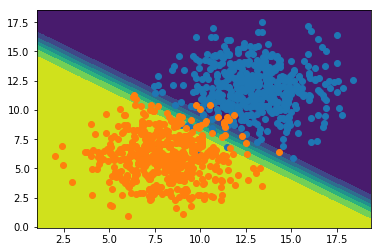

In [7]:
plot_decision_boundary(X,Y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

prediction is  [[0.9999856]]


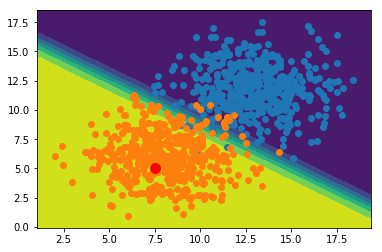

In [9]:
plot_decision_boundary(X,Y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x =  7.5
y = 5
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x],[y], marker='o', markersize=10, color="red")
print("prediction is ", prediction)